#### Задание 1
 
а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?
 
б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?
 
в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

Наиболее часто покупаемые подгруппы товаров за все время:
Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Name: count, dtype: int64

Наиболее часто покупаемые подгруппы товаров за последние два года:
Sub-Category
Binders        907
Paper          810
Furnishings    558
Phones         511
Name: count, dtype: int64

Наиболее часто покупаемые подгруппы товаров за последний год:
Sub-Category
Binders        496
Paper          454
Furnishings    310
Phones         291
Name: count, dtype: int64


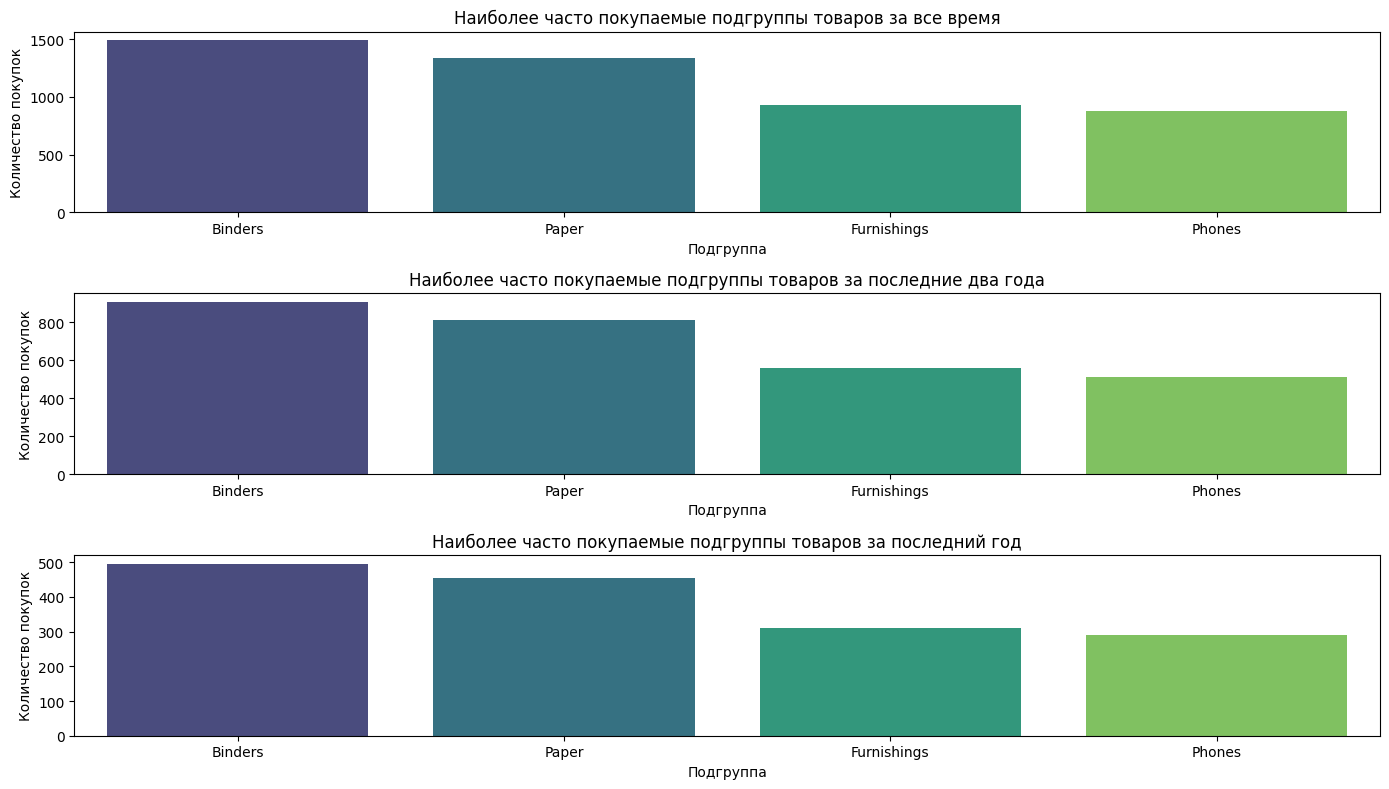

In [96]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные
df = pd.read_csv('train.csv')

# Преобразуем столбец 'Order Date' в формат datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Функция для получения наиболее часто покупаемых подгрупп товаров
def get_top_subcategories(df, start_date=None, end_date=None, top_n=4):
    if start_date:
        df = df[df['Order Date'] >= start_date]
    if end_date:
        df = df[df['Order Date'] <= end_date]
    top_subcategories = df['Sub-Category'].value_counts().head(top_n)
    return top_subcategories

# а) Наиболее часто покупаемые подгруппы товаров за все время
top_subcategories_all_time = get_top_subcategories(df)
print("Наиболее часто покупаемые подгруппы товаров за все время:")
print(top_subcategories_all_time)

# б) Наиболее часто покупаемые подгруппы товаров за последние два года
end_date = df['Order Date'].max()
start_date = end_date - pd.DateOffset(years=2)
top_subcategories_last_two_years = get_top_subcategories(df, start_date=start_date, end_date=end_date)
print("\nНаиболее часто покупаемые подгруппы товаров за последние два года:")
print(top_subcategories_last_two_years)

# в) Наиболее часто покупаемые подгруппы товаров за последний год
start_date = end_date - pd.DateOffset(years=1)
top_subcategories_last_year = get_top_subcategories(df, start_date=start_date, end_date=end_date)
print("\nНаиболее часто покупаемые подгруппы товаров за последний год:")
print(top_subcategories_last_year)

# Визуализация
plt.figure(figsize=(14, 8))

# Визуализация для всех времен
plt.subplot(3, 1, 1)
sns.barplot(x=top_subcategories_all_time.index, y=top_subcategories_all_time.values, hue=top_subcategories_all_time.index, palette='viridis', legend=False)
plt.title('Наиболее часто покупаемые подгруппы товаров за все время')
plt.xlabel('Подгруппа')
plt.ylabel('Количество покупок')

# Визуализация за последние два года
plt.subplot(3, 1, 2)
sns.barplot(x=top_subcategories_last_two_years.index, y=top_subcategories_last_two_years.values, hue=top_subcategories_last_two_years.index, palette='viridis', legend=False)
plt.title('Наиболее часто покупаемые подгруппы товаров за последние два года')
plt.xlabel('Подгруппа')
plt.ylabel('Количество покупок')

# Визуализация за последний год
plt.subplot(3, 1, 3)
sns.barplot(x=top_subcategories_last_year.index, y=top_subcategories_last_year.values, hue=top_subcategories_last_year.index, palette='viridis', legend=False)
plt.title('Наиболее часто покупаемые подгруппы товаров за последний год')
plt.xlabel('Подгруппа')
plt.ylabel('Количество покупок')

plt.tight_layout()
plt.show()

#### Выводы

Анализ данных показывает, что на протяжении всего периода наблюдений, а также в последние два года и последний год, наиболее часто покупаемыми подгруппами товаров являются папки, бумага, мебель и телефоны. Это свидетельствует о постоянном спросе на офисные принадлежности и оборудование.

#### Задание 2

Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
Можно использовать правило трех сигм.

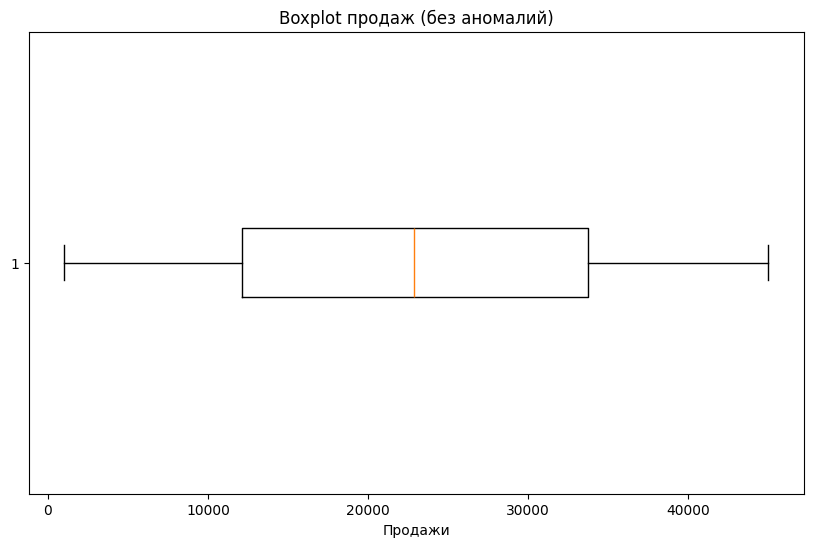

In [97]:
# Загружаем данные
df = pd.read_csv('train.csv')

# Преобразуем столбец 'Sales' в числовой формат
df['Sales'] = df['Sales'].str.replace(',', '.').astype(float)

# Применяем правило трех сигм для удаления аномалий
mean_sales = df['Sales'].mean()
std_sales = df['Sales'].std()
lower_bound = mean_sales - 3 * std_sales
upper_bound = mean_sales + 3 * std_sales

# Фильтруем данные, удаляя аномалии
filtered_df = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

# Построение boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_df['Sales'], vert=False)
plt.title('Boxplot продаж (без аномалий)')
plt.xlabel('Продажи')
plt.show()

#### Задание 3
Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) наоснове Sales
Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.

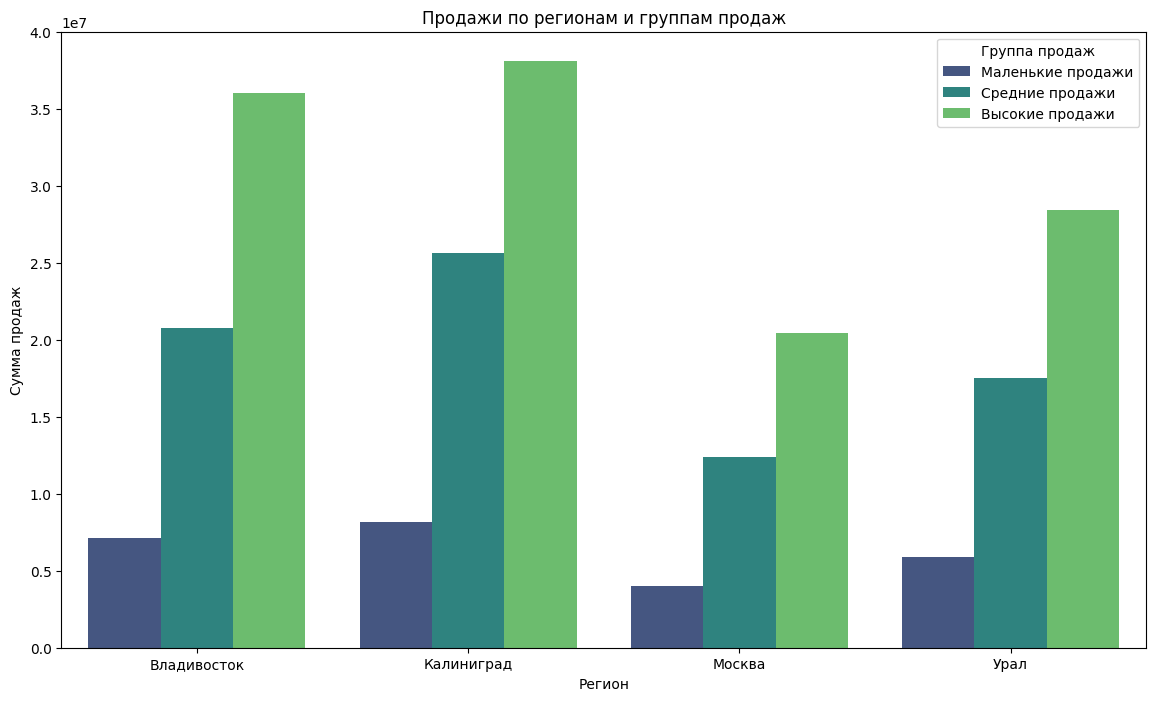

Вывод: Наиболее прибыльная группа: Высокие продажи


In [98]:
# Загружаем данные
df = pd.read_csv('train.csv')

# Преобразуем столбец 'Sales' в числовой формат
df['Sales'] = df['Sales'].str.replace(',', '.').astype(float)

# Разбиваем данные на группы продаж
bins = [df['Sales'].min(), 15000, 30000, df['Sales'].max()]
labels = ['Маленькие продажи', 'Средние продажи', 'Высокие продажи']
df['Sale_group'] = pd.cut(df['Sales'], bins=bins, labels=labels, include_lowest=True)

# Сгруппируем данные по регионам и группам продаж
grouped = df.groupby(['Region', 'Sale_group'], observed=True).agg({'Sales': 'sum', 'ID': 'count'}).reset_index()
grouped.rename(columns={'ID': 'Count'}, inplace=True)

# Визуализация
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped, x='Region', y='Sales', hue='Sale_group', palette='viridis')
plt.title('Продажи по регионам и группам продаж')
plt.xlabel('Регион')
plt.ylabel('Сумма продаж')
plt.legend(title='Группа продаж')
plt.show()

# Определение наиболее прибыльной группы
most_profitable_group = grouped.groupby('Sale_group', observed=True)['Sales'].sum().idxmax()
print(f"Вывод: Наиболее прибыльная группа: {most_profitable_group}")